In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Підвищимо розмір графіків за замовчуванням
# plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'
# plt.rcParams['figure.figsize'] = 7, 5
# plt.rcParams['axes.grid'] = True


In [2]:
# sheet names
sheet_names = ['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4', 'Sheet5']

# dictionary to hold arrays
input_matrices = {}

# read each sheet and convert to numpy array
for i, sheet in enumerate(sheet_names, start=1):
    df = pd.read_excel('er_experiments.xlsx', sheet_name=sheet)
    input_matrices[f'Matrix_{i}'] = df.to_numpy()

# access the numpy array for a specific matrix
# print(input_matrices)


In [3]:
# define emotion classes
EMOTIONS = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# dataframe to hold the results
df_results = pd.DataFrame()

# iterate over each confusion matrix
for matrix_name, A in input_matrices.items():

    # calculate accuracy
    accuracy = np.trace(A) / np.sum(A)

    # flatten the matrix for sklearn metrics
    y_true = np.repeat(np.arange(A.shape[0]), np.sum(A, axis=1))
    y_pred = np.repeat(np.arange(A.shape[0]), np.sum(A, axis=0))

    # calculate precision, recall and f1-score independently for each class
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f_score = f1_score(y_true, y_pred, average=None)

    # create a dataframe from the metrics
    df = pd.DataFrame({
        'Emotion': EMOTIONS,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f_score
    })

    # add accuracy column (same value for each class)
    df['Accuracy'] = accuracy

    # add matrix name column
    df['Matrix'] = matrix_name

    # append this dataframe to the results dataframe
    df_results = df_results.append(df, ignore_index=True)

# set the Matrix and Emotion columns as the index
# df_results.set_index(['Matrix', 'Emotion', 'Precision', 'Recall', 'F1-Score', 'Accuracy'], inplace=True)

# Save the DataFrame to an Excel file
# df_results.to_excel('df_results.xlsx')

# Save the DataFrame to a csv file
df_results.to_csv('df_results.csv')

# print the dataframe
df_results


,Emotion,Precision,Recall,F1-Score,Accuracy,Matrix
0,angry,0.939216,1.000000,0.968655,0.176790,Matrix_1
1,disgust,0.644737,0.441441,0.524064,0.176790,Matrix_1
2,fear,1.000000,0.830078,0.907150,0.176790,Matrix_1
3,happy,0.919008,0.940248,0.929507,0.176790,Matrix_1
4,neutral,0.906618,1.000000,0.951022,0.176790,Matrix_1
5,sad,0.999185,0.983160,0.991108,0.176790,Matrix_1
6,surprise,1.000000,0.998797,0.999398,0.176790,Matrix_1
7,angry,0.974568,1.000000,0.987120,0.179855,Matrix_2
8,disgust,1.000000,0.648649,0.786885,0.179855,Matrix_2
9,fear,0.983471,0.813477,0.890433,0.179855,Matrix_2


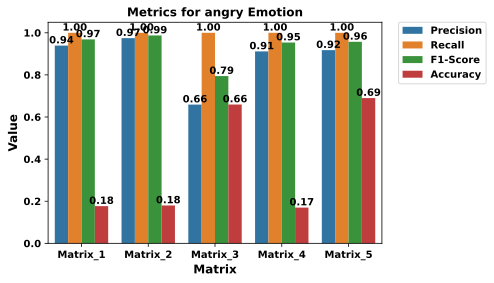

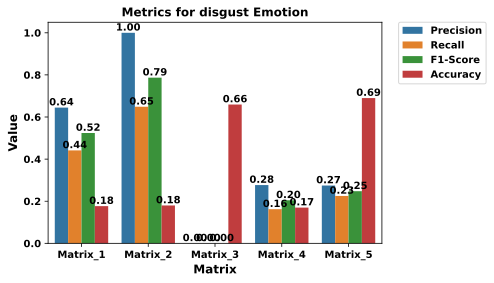

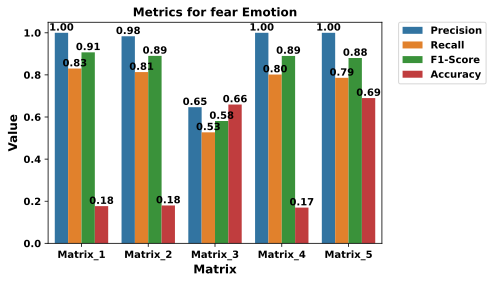

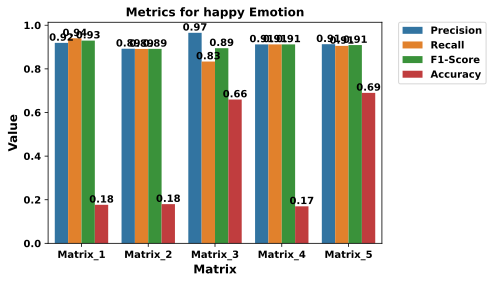

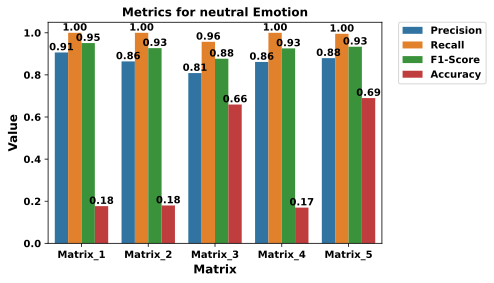

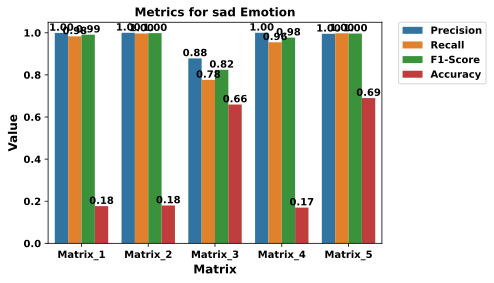

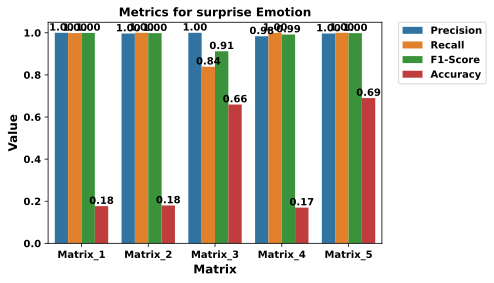

In [7]:
# Get unique emotions
emotions = df_results['Emotion'].unique()

# Loop over each emotion
for emotion in emotions:
    # Filter rows for the current emotion
    emotion_data = df_results[df_results['Emotion'] == emotion]

    # Melt the DataFrame to long format for easy plotting with seaborn
    emotion_data_melt = pd.melt(emotion_data, id_vars=['Matrix', 'Emotion'],
                                value_vars=['Precision', 'Recall', 'F1-Score', 'Accuracy'])

    # Plot the data
    plt.figure(figsize=(6,4), dpi=600)
    plt.rcParams.update({
        'font.size': 10,
        'font.weight': 'bold'})
    
    # sns.set_context("paper", font_scale=2)
    barplot = sns.barplot(x='Matrix', y='value', hue='variable', data=emotion_data_melt)

    # Add title and labels
    plt.title(f'Metrics for {emotion} Emotion', fontweight='bold', fontsize=12)
    plt.ylabel('Value', fontweight='bold', fontsize=12)
    plt.xlabel('Matrix', fontweight='bold', fontsize=12)

    # Move the legend to an empty part of the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Add data values on top of each bar
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.2f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0,5),
                        textcoords='offset points')
    #save the plot
    # plt.savefig(f'barplots/emotion_{emotion}.svg', format='svg', bbox_inches='tight')
    
    # Show the plot
    plt.show()


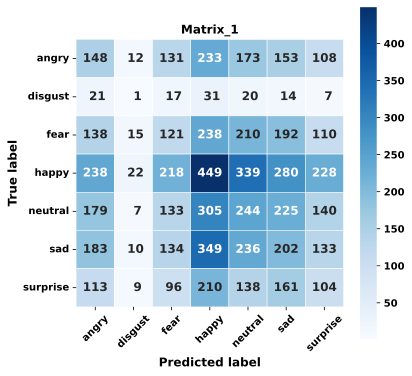

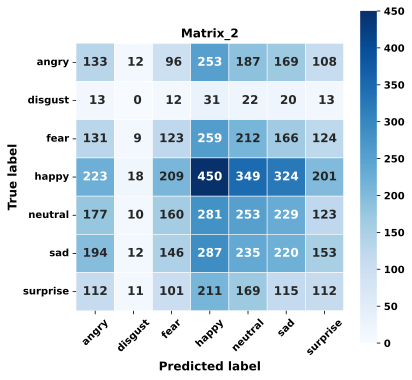

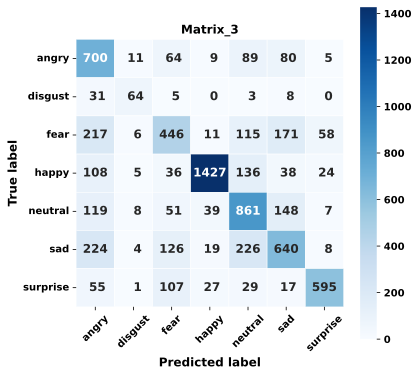

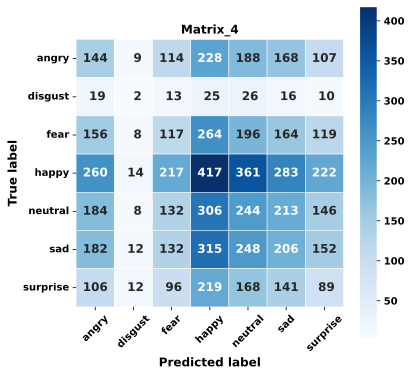

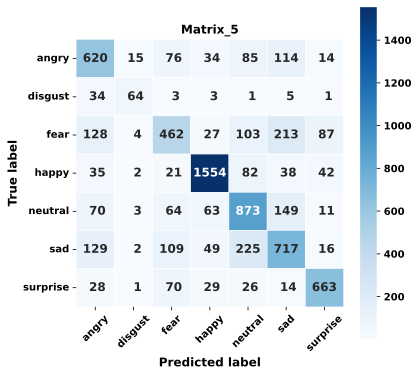

In [5]:
# Loop over each matrix and plot it
for matrix_name, matrix in input_matrices.items():
    plt.figure(figsize=(6,6), dpi=600)

    sns.heatmap(matrix, cmap='Blues', annot=True, xticklabels=EMOTIONS,
                yticklabels=EMOTIONS, annot_kws={"size": 12, "weight": "bold"},
                fmt='3g', square=True, linewidths=0.5, cbar_kws={"shrink": 1.0})

    #plt.tick_params(axis='x', labelsize=12) # x font label size
    #plt.tick_params(axis='y', labelsize=12) # y font label size

    plt.yticks(fontweight='bold', fontsize=10, rotation=0)
    plt.xticks(fontweight='bold', fontsize=10, rotation=45)

    plt.title(matrix_name, fontweight='bold', fontsize=12)
    plt.ylabel('True label', fontweight='bold', fontsize=12)
    plt.xlabel('Predicted label', fontweight='bold', fontsize=12)

    # plt.savefig(f'heatmaps/heatmap_{matrix_name}.png', dpi=600, bbox_inches='tight')
    # plt.savefig(f'heatmaps/heatmap_{matrix_name}.svg', bbox_inches='tight')
    plt.show()


MODEL_NAME = 'Модель_1'

plt.figure(figsize=(6, 6), dpi = 600)

sns.heatmap(input_matrices['Matrix_1'], cmap='Blues', annot=True, xticklabels=EMOTIONS,
            yticklabels=EMOTIONS, annot_kws={"size": 10, "weight": "bold"},
            fmt='3g', square=True, linewidths=0.5, cbar_kws={"shrink": 1.0})

#plt.tick_params(axis='x', labelsize=12) # x font label size
#plt.tick_params(axis='y', labelsize=12) # y font label size

plt.yticks(fontweight='bold', fontsize=10, rotation=0)
plt.xticks(fontweight='bold', fontsize=10, rotation=45)

plt.title(MODEL_NAME, fontweight='bold', fontsize=10)
plt.ylabel('True label', fontweight='bold', fontsize=10)
plt.xlabel('Predicted label', fontweight='bold', fontsize=10)

# plt.savefig(f'{MODEL_NAME}.png', dpi=600, bbox_inches='tight')
# plt.savefig(f'{MODEL_NAME}.svg', bbox_inches='tight')
plt.show()